# Visualize Compass Calibration Data

Import all Libraries

In [1]:
import pandas as pd
from calibration import calibrate_from_file
from visualize import plot

Import Data and print Head

In [2]:
compass_data_path = "../../.data/compass/device-monitor-240507-214713.log"
compass_data = pd.read_csv(compass_data_path)

compass_data.head()

,x,y,z
0,-337,268,1308
1,-340,271,1311
2,-342,273,1306
3,-342,276,1311
4,-337,276,1313


Plot the compass data

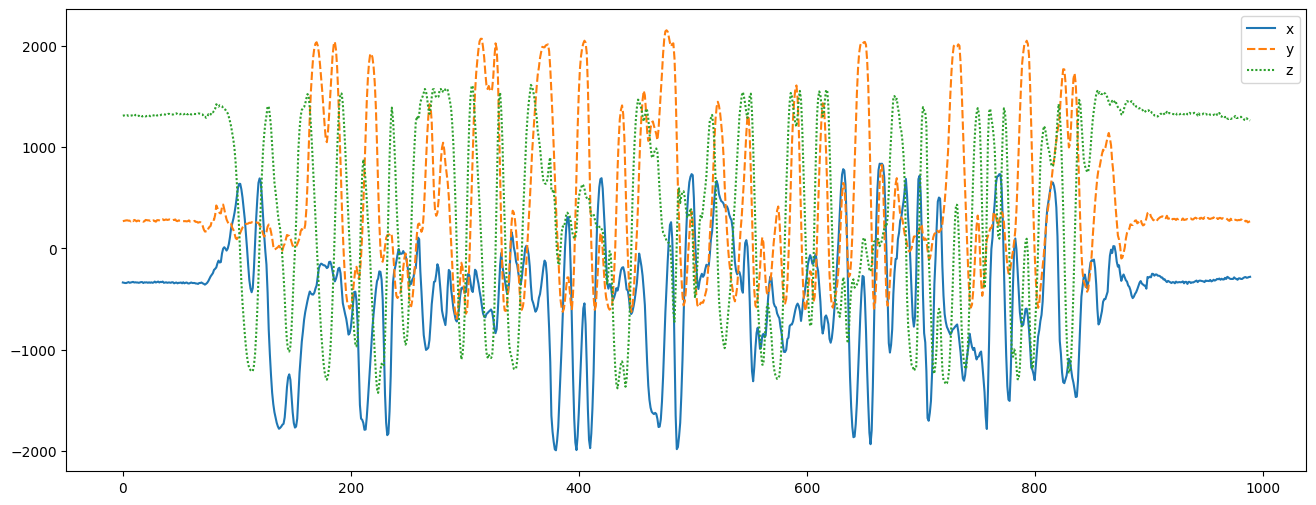

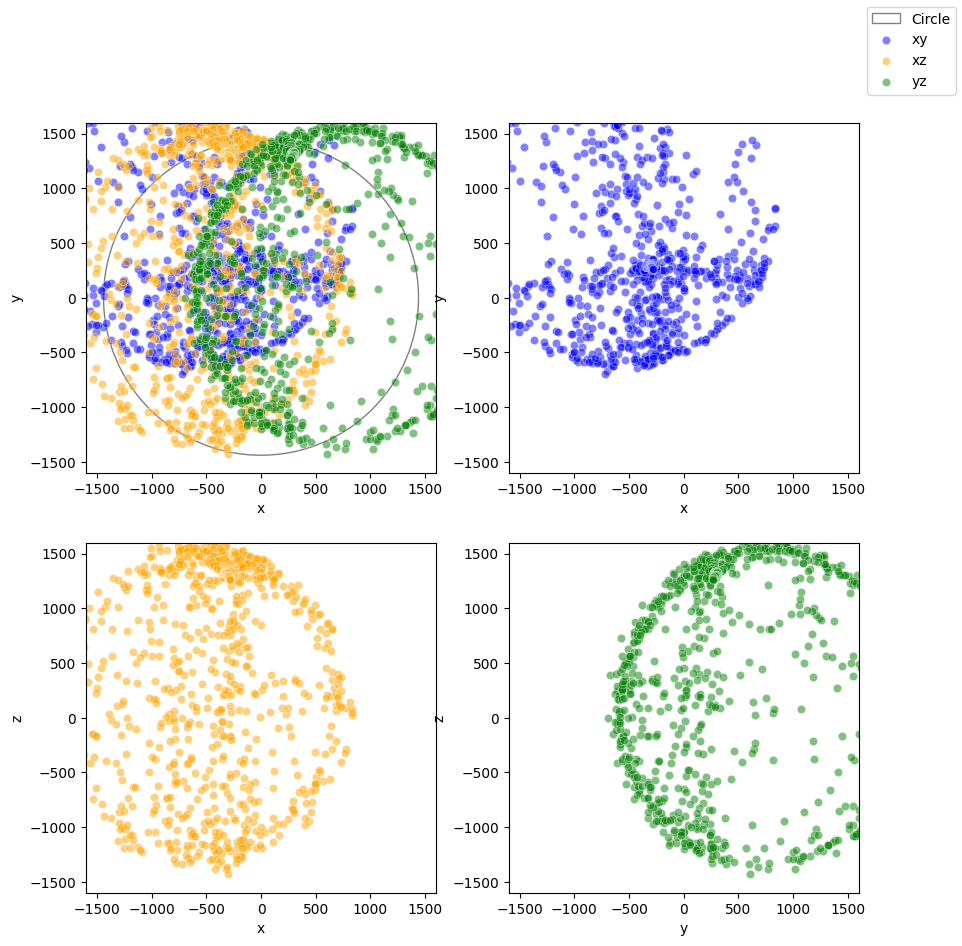

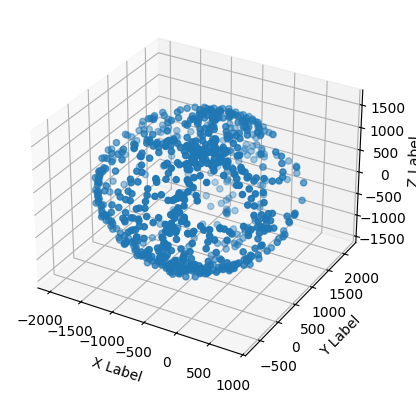

In [3]:
plot(compass_data)

calibrate compass data and plot calibrated data

Offsets: [np.float64(-582.7555823191259), np.float64(738.1362679186733), np.float64(73.60810541925663)]
Scale: [np.float64(1371.567404588486), np.float64(1364.1750003047134), np.float64(1443.0382165084063)]


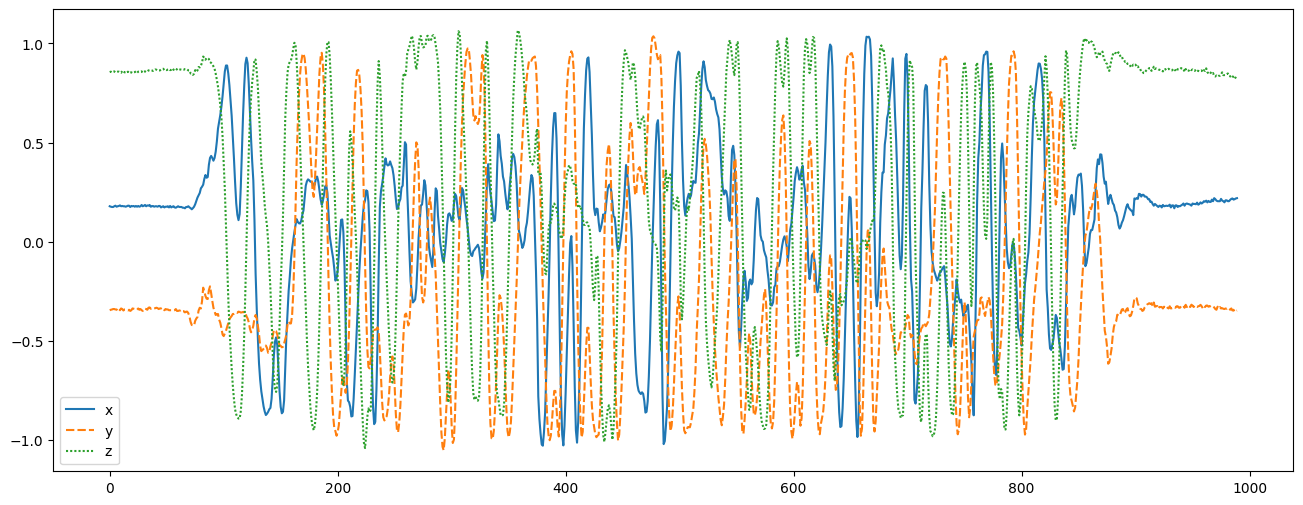

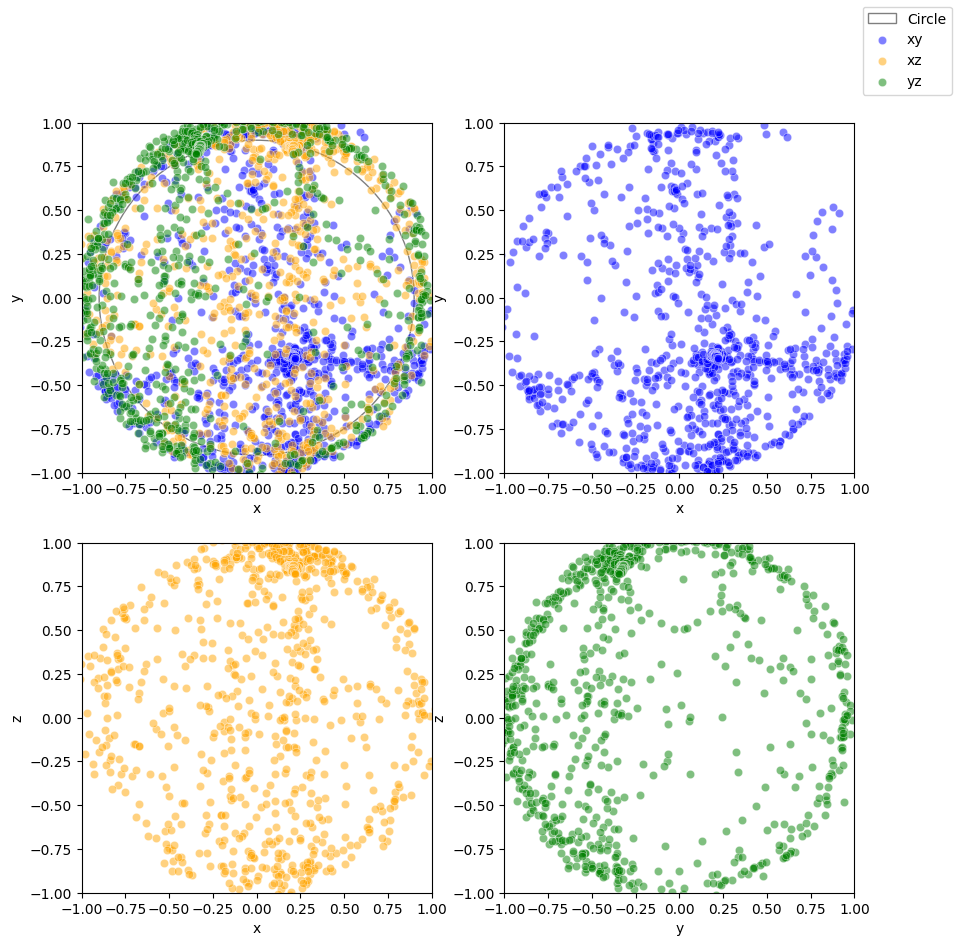

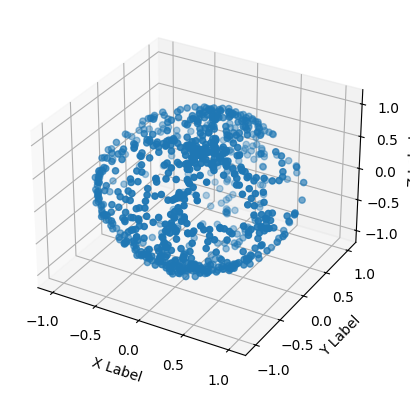

In [4]:
(offsets, scale) = calibrate_from_file(compass_data_path)
print(f"Offsets: {offsets}")
print(f"Scale: {scale}")

# offsets = [-582.755582319061, 738.1362679188125, 73.60810541927806]
# scale = [1371.5674045885469, 1364.1750003047318, 1443.0382165087578]

x = (compass_data['x'].to_numpy() - offsets[0]) / scale[0]
y = (compass_data['y'].to_numpy() - offsets[1]) / scale[1]
z = (compass_data['z'].to_numpy() - offsets[2]) / scale[2]

calibrated_data = pd.DataFrame({'x': x, 'y': y, 'z': z})

plot(calibrated_data, limit=1)

Implementation of the least square solution without linear algebra module

In [5]:
import numpy as np

compass_data.head()

x = compass_data['x'].to_numpy()
y = compass_data['y'].to_numpy()
z = compass_data['z'].to_numpy()

H_T = np.array([x, y, z, -y**2, -z**2, np.ones([len(x)])])
# H_T.shape

H = np.transpose(H_T)
w = x**2

H_TH = np.matmul(H_T, H)
# H_TH.shape

b = np.matmul(H_T, w)
# b.shape

H_TH_inv = np.linalg.inv(H_TH)
# H_TH_inv.shape

X = np.matmul(H_TH_inv, b)

OSx = X[0] / 2
OSy = X[1] / (2 * X[3])
OSz = X[2] / (2 * X[4])

A = X[5] + OSx**2 + X[3] * OSy**2 + X[4] * OSz**2
B = A / X[3]
C = A / X[4]

SCx = np.sqrt(A)
SCy = np.sqrt(B)
SCz = np.sqrt(C)

offsets = [OSx, OSy, OSz]
scale = [SCx, SCy, SCz]

print(f"Offsets: {offsets}")
print(f"Scale: {scale}")

x = (compass_data['x'].to_numpy() - offsets[0]) / scale[0]
y = (compass_data['y'].to_numpy() - offsets[1]) / scale[1]
z = (compass_data['z'].to_numpy() - offsets[2]) / scale[2]

calibrated_data = pd.DataFrame({'x': x, 'y': y, 'z': z})

# plot(calibrated_data, limit=1)


Offsets: [np.float64(-582.7555823188791), np.float64(738.1362679160242), np.float64(73.60810541950579)]
Scale: [np.float64(1371.5674045866108), np.float64(1364.1750003039817), np.float64(1443.0382165097249)]
